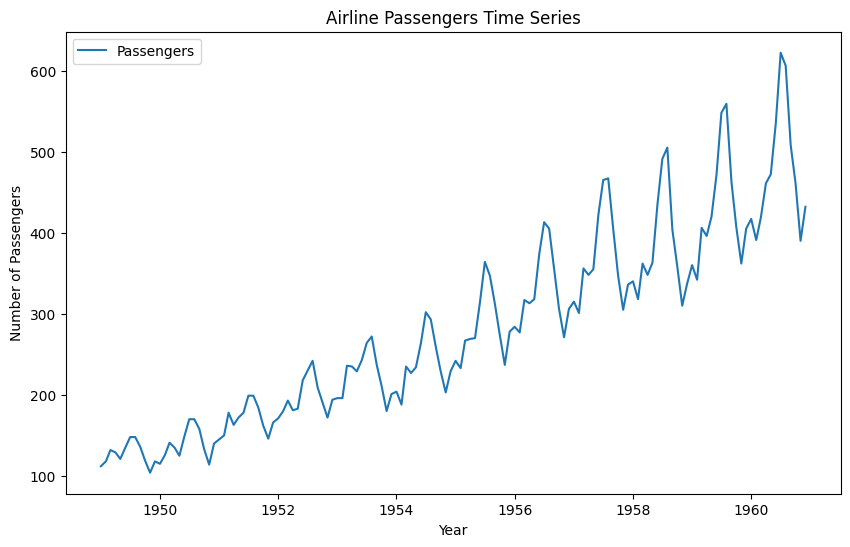

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 1541.3957425312913


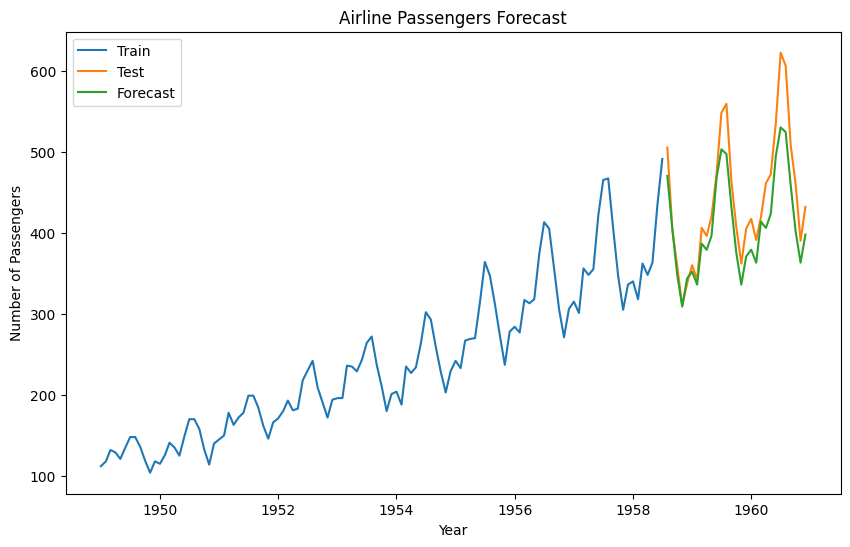

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Load the dataset from CSV
df = pd.read_csv('exp8_airlinepassenger.csv')

# Convert 'Month' column to datetime format and set it as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], label='Passengers')
plt.title('Airline Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Select and fit the model
model = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(len(test))

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

# Visualize forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('Airline Passengers Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [ ]:
# In conclusion, time series forecasting stands as a cornerstone in understanding and
# predicting sequential data patterns across diverse fields such as finance, economics,
# weather forecasting, and more. Through a combination of statistical methods, machine learning algorithms, and
# domain expertise, analysts can uncover valuable insights, anticipate trends, and make informed decisions.

# Despite the complexity inherent in time series data, advancements in methodologies and
#  the availability of powerful tools have democratized forecasting, allowing both seasoned
#  professionals and novices to extract meaningful information from their data

#  Furthermore, the integration of modern technologies like artificial intelligence and
#  big data analytics continues to push the boundaries of time series forecasting, enabling the
#  handling of larger datasets and the discovery of more intricate patterns. As a result, businesses
#  can make proactive decisions, optimize resource allocation, and mitigate risks in a dynamic and uncertain environment.